In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot style
sns.set(style="whitegrid")


In [75]:
df = pd.read_csv('../data/cleaned/cleaned_tracks.csv')

# Preview data
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,genre
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.744000,0.151,0.127,104.851,3,1922.0,Other
1,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,186800,0,Lucien Boyer,['4mSouLpNSEY1d7OdIjlFiP'],NaN,0.703,0.2800,...,1,0.1740,0.995,0.000068,0.163,0.897,127.531,4,NaN,Other
2,112adU33vo4C1eRZct2hWy,Nuits De Chine,4,180800,0,Louis Lynel,['28pbIiOohRRZjqpAM9iqYM'],NaN,0.420,0.2880,...,1,0.0701,0.994,0.000216,0.196,0.400,139.575,3,NaN,Other
3,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,Bessie Smith,['5ESobCkc6JI4tIMxQttqeg'],NaN,0.614,0.0423,...,1,0.0535,0.996,0.002930,0.183,0.211,89.822,4,NaN,Other
4,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"Louis Armstrong, Earl Hines","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",NaN,0.831,0.2620,...,1,0.0942,0.984,0.912000,0.204,0.901,104.606,4,NaN,Other


In [76]:
# Sort and select top 10 by popularity
top_tracks = df.sort_values(by='popularity', ascending=False).head(100)

# Show result
top_tracks[['name', 'artists', 'popularity']]

,name,artists,popularity
73256,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100
73257,drivers license,Olivia Rodrigo,99
73258,Astronaut In The Ocean,Masked Wolf,98
72270,telepatía,Kali Uchis,97
72269,Save Your Tears,The Weeknd,97
...,...,...,...
72349,Lemonade,"Internet Money, Gunna, Don Toliver, NAV",87
72347,SugarCrash!,ElyOtto,87
72345,Chica Ideal,"Sebastian Yatra, Guaynaa",87
72365,Put Your Records On,Ritt Momney,87


In [77]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'genre'],
      dtype='object')

In [78]:
import os

# Create directory if it doesn't exist
os.makedirs('../reports/figures/', exist_ok=True)


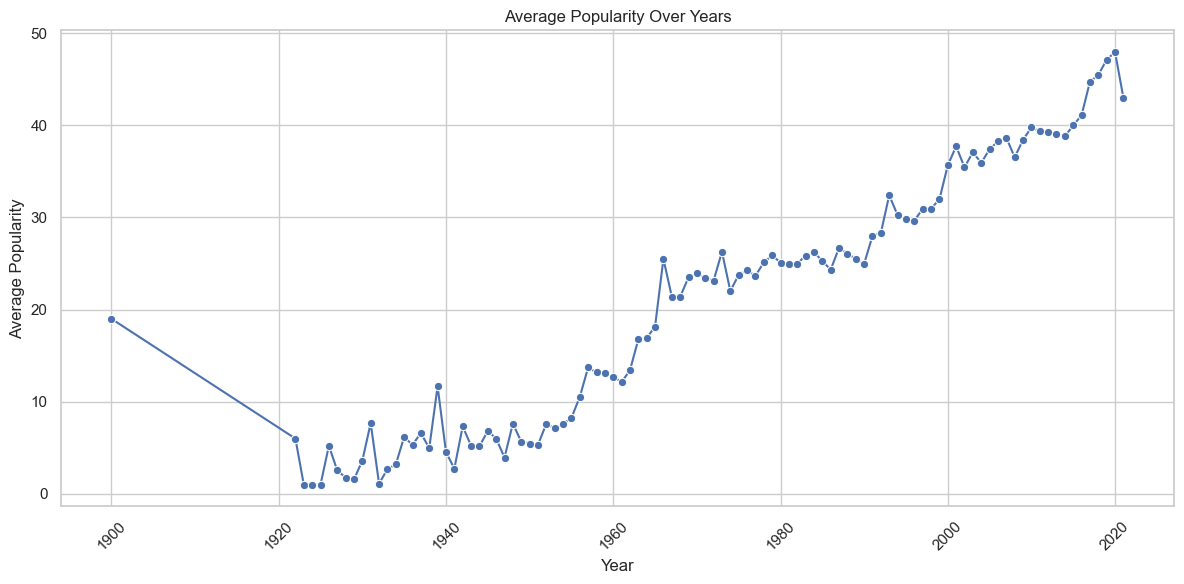

In [79]:
# Group by year and calculate average popularity
popularity_by_year = df.groupby('year')['popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=popularity_by_year, x='year', y='popularity', marker='o')
plt.title('Average Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/popularity_over_years.png')
plt.show()

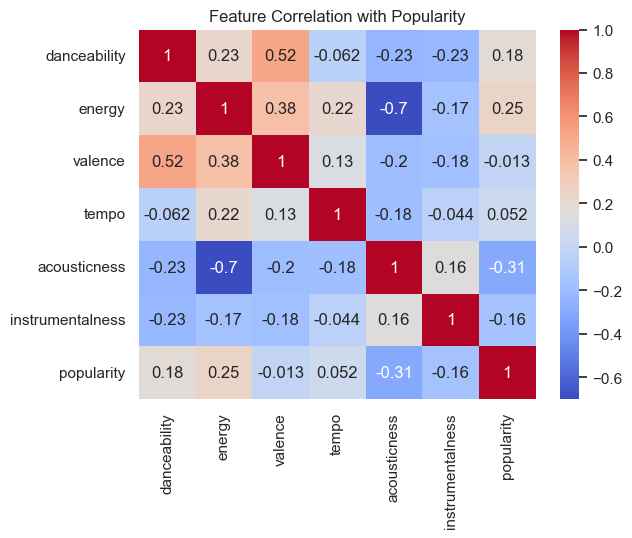

In [80]:
# Select audio features + popularity
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'popularity']

# Correlation heatmap
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Popularity')
plt.show()